<a href="https://colab.research.google.com/github/jiakingng/test3/blob/main/%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB/1-%E6%9E%84%E5%BB%BA%E8%87%AA%E5%B7%B1%E7%9A%84%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86/%E3%80%90C1%E3%80%91%E4%B8%8B%E8%BD%BDDemo%E6%95%B0%E6%8D%AE%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 下载Demo数据集

同济子豪兄 https://space.bilibili.com/1900783

代码运行[云GPU平台](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)

2022-8-2

## melon17瓜果图像分类数据集

In [1]:
# 下载压缩包
# 如报错 Unable to establish SSL connection. 重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/melon17/melon17_full.zip

--2023-04-15 06:07:50--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/melon17/melon17_full.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131303074 (125M) [application/zip]
Saving to: ‘melon17_full.zip’

melon17_full.zip    100%[===================>] 125.22M  11.1MB/s    in 13s     

2023-04-15 06:08:06 (9.41 MB/s) - ‘melon17_full.zip’ saved [131303074/131303074]



In [3]:
# 解压
!unzip melon17_full.zip >> /dev/null

replace melon17_full/苦瓜/63.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset_path = 'melon17_full'
os.chdir(dataset_path)
os.listdir()

['苦瓜',
 '佛手瓜',
 '甜瓜-金',
 '西瓜',
 '哈密瓜',
 '甜瓜-白',
 '甜瓜-伊丽莎白',
 '西葫芦',
 '冬瓜',
 '黄瓜',
 '人参果',
 '木瓜',
 '丝瓜',
 '南瓜',
 '羊角蜜',
 '白兰瓜',
 '甜瓜-绿']

In [8]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

流式输出内容被截断，只能显示最后 5000 行内容。
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [9]:
df

,类别,文件名,图像宽,图像高
0,苦瓜,184.jpg,387,500
1,苦瓜,80.jpg,612,396
2,苦瓜,71.jpg,587,443
3,苦瓜,72.jpg,600,400
4,苦瓜,79.jpg,500,500
...,...,...,...,...
2580,甜瓜-绿,137.jpg,350,300
2581,甜瓜-绿,118.jpg,500,333
2582,甜瓜-绿,85.jpg,600,420
2583,甜瓜-绿,48.jpg,350,350


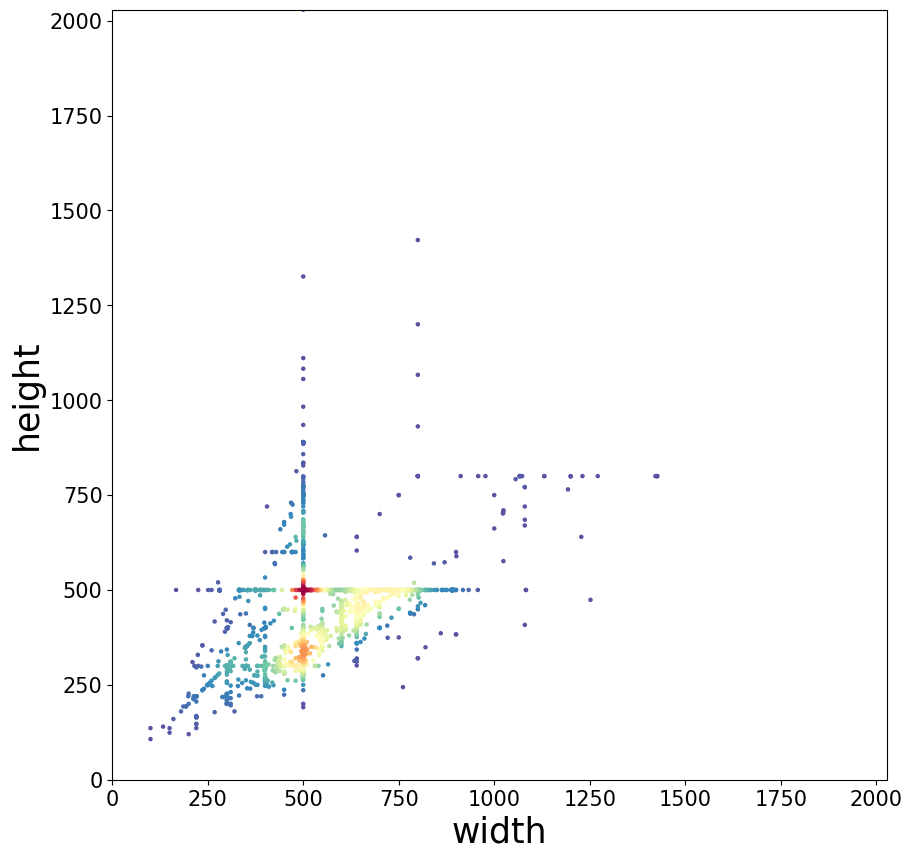

In [10]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()